In [1]:
import os
import Ouzo_Sampling_Wtf_Lattice_Volume as create
import matplotlib.pyplot as plt
import numpy as np
import OT2_Ouzo_Commands as ot2_commands
from opentrons import simulate, execute, protocol_api

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


Loading json containers...
Json container file load complete, listing database
Found 0 containers to add. Starting migration...
Database migration complete!


In [2]:
experiment_dict = create.get_experiment_plan(r"C:\Users\Edwin\Desktop\Run 0917\09_17_20_E_P_Scan.csv") # Intialize master dictionary from excel sheet
component_dict = create.dict_creator(experiment_dict, 'Component') # Gather all information concerning components into one dictionary
stock_dict = create.dict_creator(experiment_dict, 'Stock') 
opentrons_dict = create.dict_creator(experiment_dict, 'OT2')

In [3]:
total_sample_mass = experiment_dict['Sample Mass']
wtf_sample_canidates = create.generate_candidate_lattice_concentrations(component_dict) # there is a built in filter for anything summing to over 1, could be somewhat informative
sample_stock_volumes = create.calculate_volumes(total_sample_mass, wtf_sample_canidates, component_dict, stock_dict) # created in uL
filtered_wtf_samples, filtered_volume_samples = create.filter_samples(wtf_sample_canidates, sample_stock_volumes, 30, 1000)
print('sample filtered out =', len(sample_stock_volumes)-len(filtered_volume_samples))
print('samples remaining =', len(filtered_volume_samples))

sample filtered out = 183
samples remaining = 42


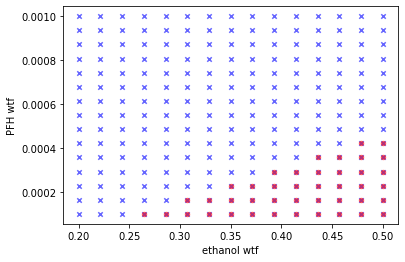

In [8]:
wtf_sample_canidates_rearranged = create.rearrange(wtf_sample_canidates)
wtf_final_samples_rearranged = create.rearrange(filtered_wtf_samples)
marker_size = 20

x_index = 3
x_component_name = component_dict['Component Shorthand Names'][x_index]

y_index = 2
y_component_name = component_dict['Component Shorthand Names'][y_index]

# Plot all canidates
plt.scatter(wtf_sample_canidates_rearranged[3], 
            wtf_sample_canidates_rearranged[2], 
            marker_size, alpha = 0.6, marker = 'x', color = 'b')

# Plot samples actually made 
plt.scatter(wtf_final_samples_rearranged[3], # could automate by looking at the experiment names
            wtf_final_samples_rearranged[2], 
            marker_size, alpha = 0.5, marker = 'o', color = 'r')


plt.xlabel(x_component_name + ' wtf')
plt.ylabel(y_component_name + ' wtf')

# could print on graph other useful information like the concentration of the other components.

plt.show()
# index refers to order of list in csv file
# plt.xlim([0,1])
# plt.ylim([0,1])

In [ ]:
component_volume_lists = create.rearrange(filtered_volume_canidates)
protocol = simulate.get_protocol_api('2.0')
ot2_commands.run(protocol, experiment_dict, opentrons_dict, component_volume_lists) # alright cmon wig!